Use Hierarchical Clustering with different linkage criteria (Ward, Maximum or complete linkage, Average linkage, Single linkage) to the database BDParkinson_Prediction.csv. Discuss the clusters obtained. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set(style='whitegrid',
        rc={'lines.linewidth': 2.5,
        'figure.figsize': (10, 8),
        'text.usetex': False,
        # 'font.family': 'sans-serif',
        # 'font.sans-serif': 'Optima LT Std',
        })

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.stats import truncnorm

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

filename = 'BDParkinson_Prediction.csv'
training_data = pd.read_csv(filename)


feature_vectors = training_data.drop(['CLASS'], axis=1)

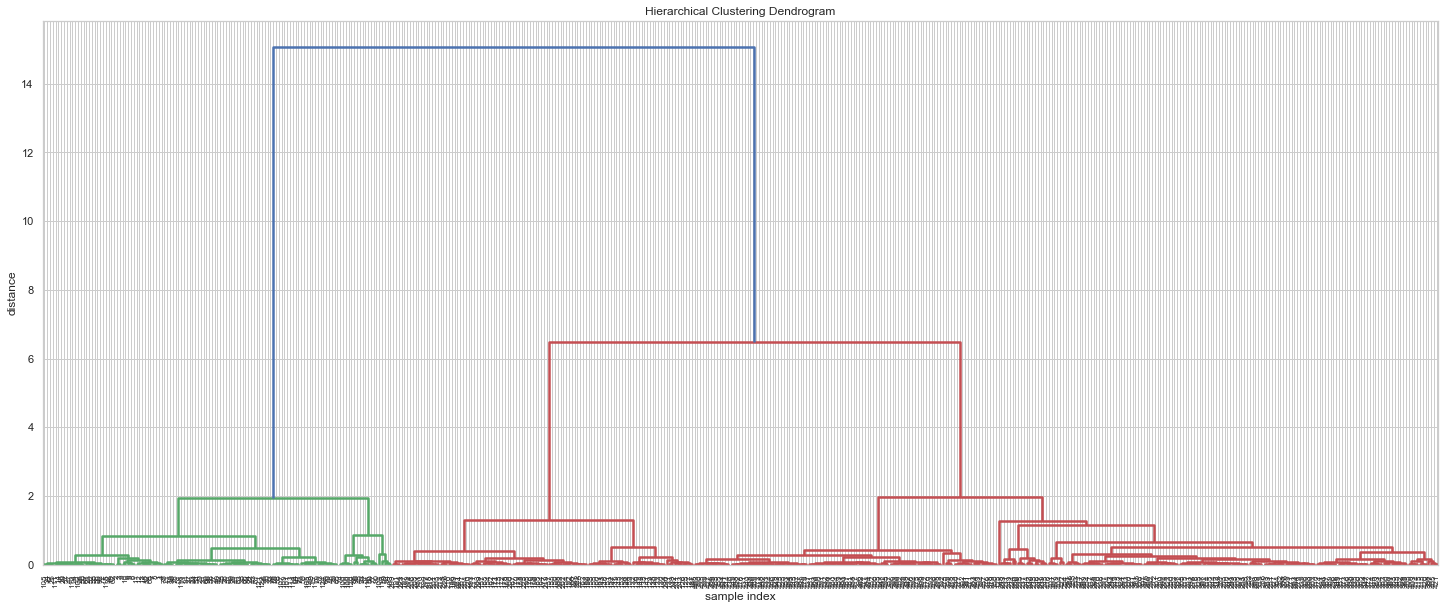

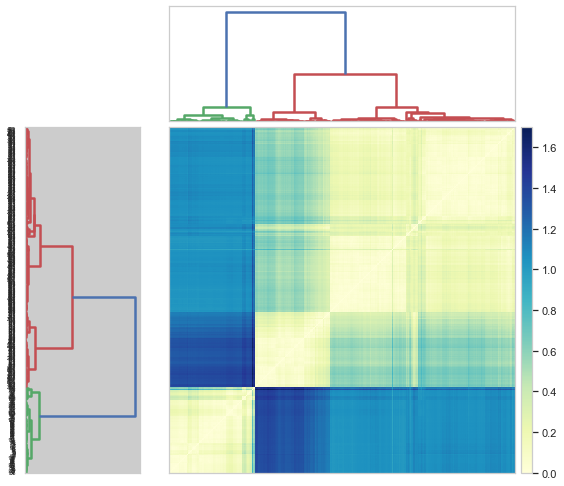

In [2]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import cophenet
# generate the linkage matrix
Z = linkage(feature_vectors, 'ward')

c, coph_dists = cophenet(Z, pdist(feature_vectors))

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           )
plt.show()

data_dist = pdist(feature_vectors)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='ward')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

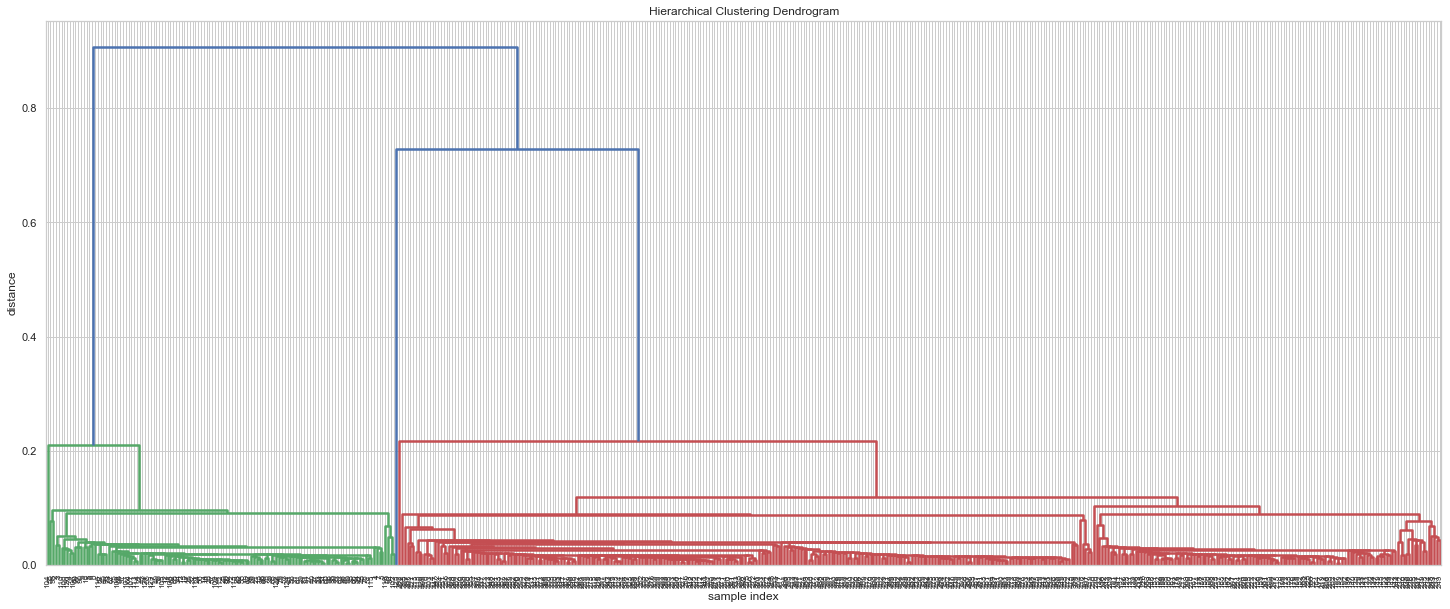

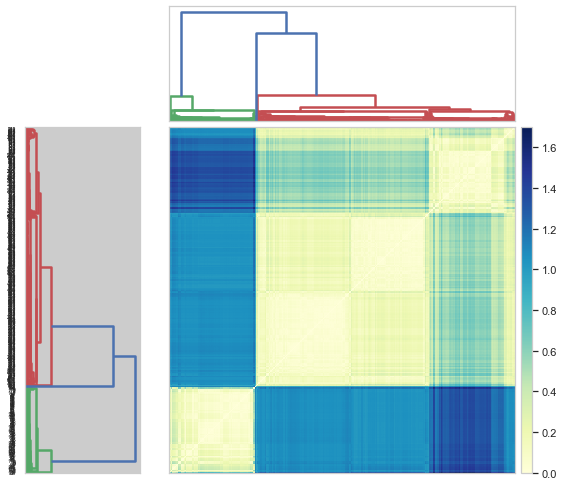

In [3]:
# generate the linkage matrix
Z = linkage(feature_vectors, 'single')

c, coph_dists = cophenet(Z, pdist(feature_vectors))

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           )
plt.show()

data_dist = pdist(feature_vectors)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

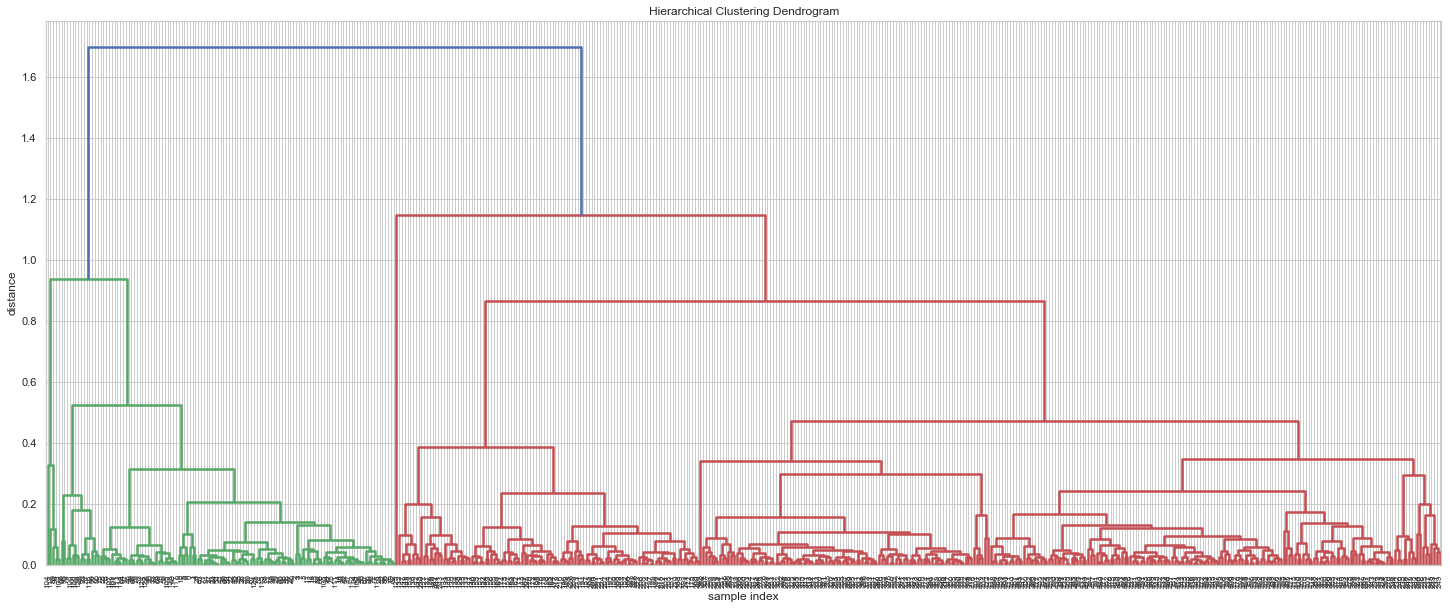

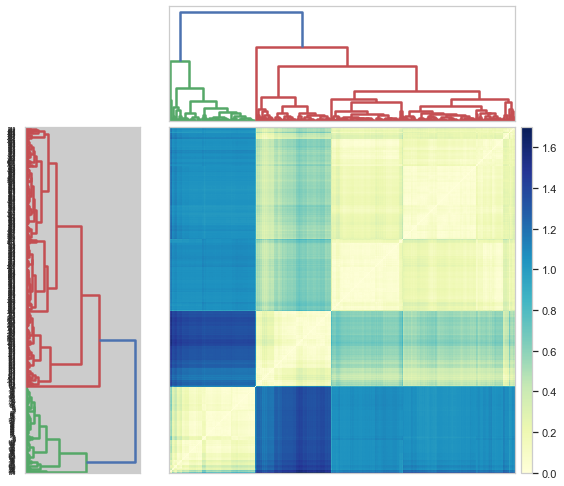

In [4]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import cophenet
# generate the linkage matrix
Z = linkage(feature_vectors, 'complete')

c, coph_dists = cophenet(Z, pdist(feature_vectors))

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           )
plt.show()

data_dist = pdist(feature_vectors)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='complete')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

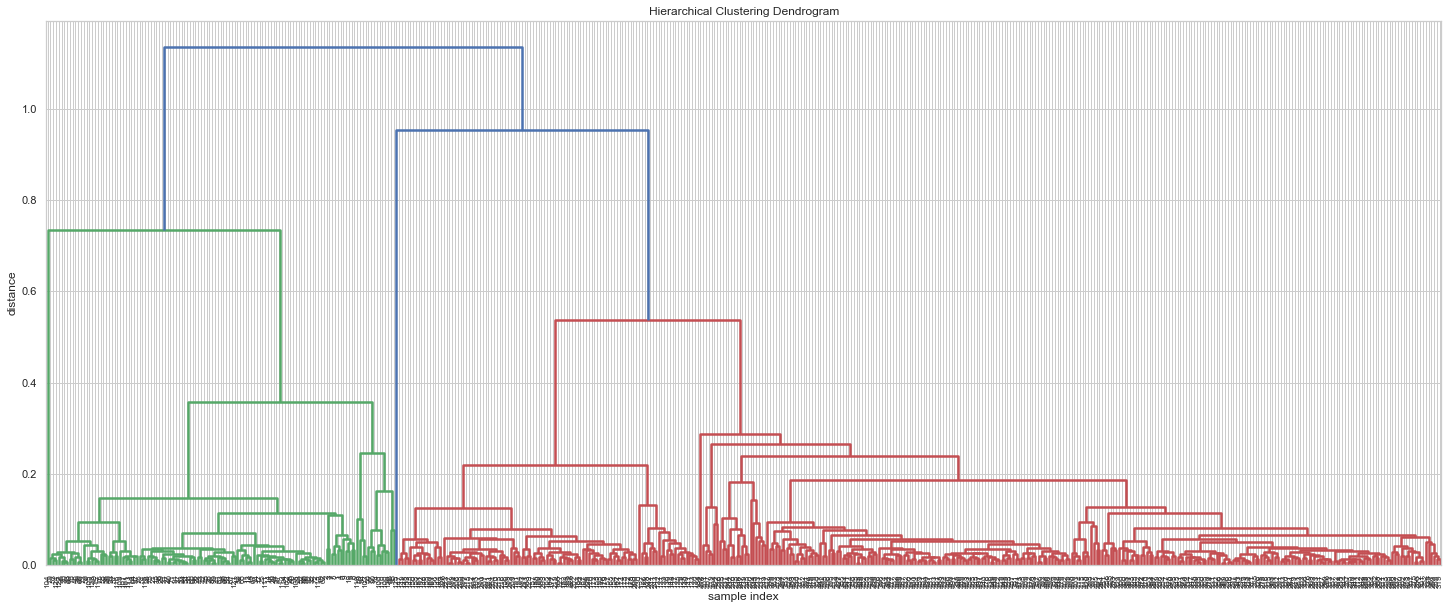

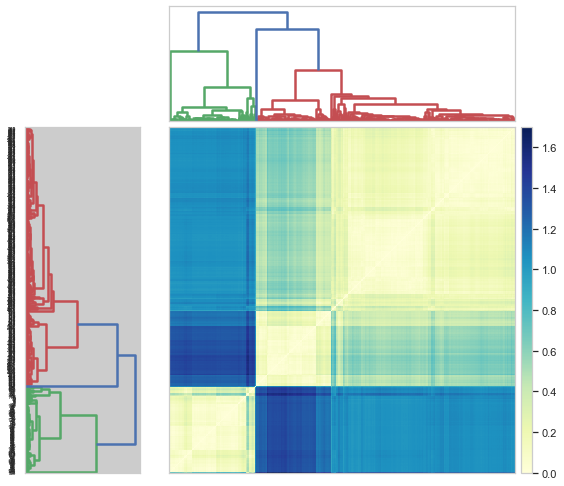

In [5]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import cophenet
# generate the linkage matrix
Z = linkage(feature_vectors, 'average')

c, coph_dists = cophenet(Z, pdist(feature_vectors))

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           )
plt.show()

data_dist = pdist(feature_vectors)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='average')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

Having 4 classes, to make my decision for reaching the most optimal number of clusters I used the dendogram to visualize, I've decided to choose the number of clusters by doing the following: determining the largest vertical distance that doesn't intersect any of the other cluster, draw a horizontal line at both extremities, the optimal number of clusters is equal to the number of vertical lines going through the horizontal line. Also using the elbow method using k-means, which the sum of squares at each number of clusters is calculated and graphed, I look for the change of steep to shallow(an elbow) for the best optimal result given which was the number of 2 clusters for this given example. 

Ward Linkage: Pretends to merge the clusters, the distance between clusters is the sum of squared differences within all clusters 
Single Linkage: distance between two clusters is the shortest distance between two points in each cluster 
Complete Linkage: distance between two clusters is the longest distance between two points in each cluster 
Average Linkage: distance between clusters is the average distance between each point in one cluster to every point in other cluster


K-means is a simple unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. The algorithm is somewhat naive--it clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, users need some way to determine whether they are using the right number of clusters.

To determine if the correct number of k clusters a dendogram can be used to visualize the Hierarchical Clustering of data points. There exists 4 classes within our dataset. Making this decision is enforced by the following methods: 
by  determining the largest vertical distance that doesn't intersect another cluster, draw a horizontal line at both extremities, the optimal number of clusters is equal to the number of vertical lines going through the horizontal line. The elbow method which implements k-means, which the sum of squares at each number of clusters is calculated and graphed. The criteria is to find change of steep to shallow, which creates an elbow, for the best optimal result given.  For this given example, the number of k clusters is 2.